In [119]:
import pandas as pd
import numpy as np
!pip install eli5
import os
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
import math

In [120]:
os.getcwd()

'/content'

In [121]:
#importing the dataset
data = pd.read_csv("https://raw.githubusercontent.com/sainikhilreddychalla/DataScience-Engineering-Methods/main/Hotel_Reservations.csv")

In [122]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [123]:
#Q1 : What are the data types? (Only numeric and categorical)
#There are 2 types : Numerical and Categorical
#Numerical - no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, required_car_parking_space, lead_time, arrival_year, arrival_month, arrival_date, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests
#Categorical- Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, booking_status

In [124]:
#Q2 : Are there missing values?
#There are no missing values in the dataset
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<Axes: >

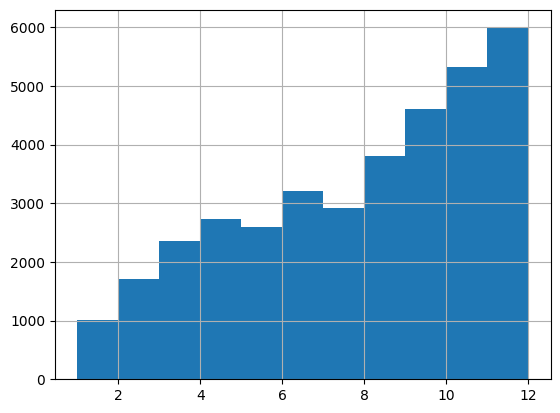

In [125]:
#Q3 : What are the likely distributions of the numeric variables?
bin_values = np.arange(start = 1, stop = 13, step = 1)
data.arrival_month.hist(bins=bin_values)

<Axes: >

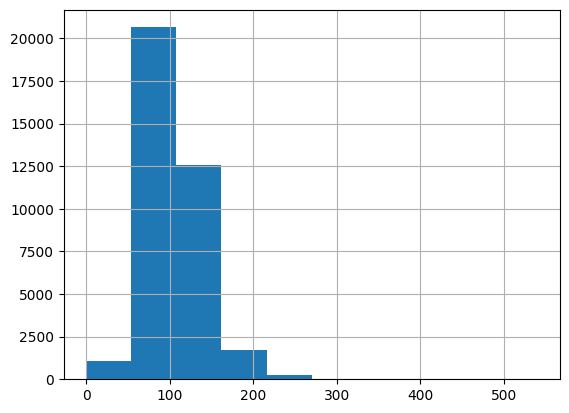

In [126]:
data.avg_price_per_room.hist()

<Axes: >

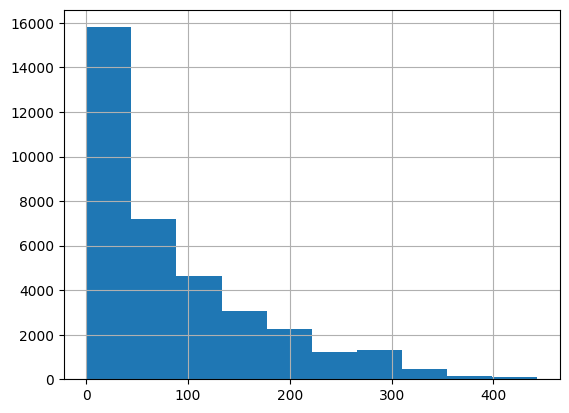

In [127]:
data.lead_time.hist()

<Figure size 800x500 with 0 Axes>

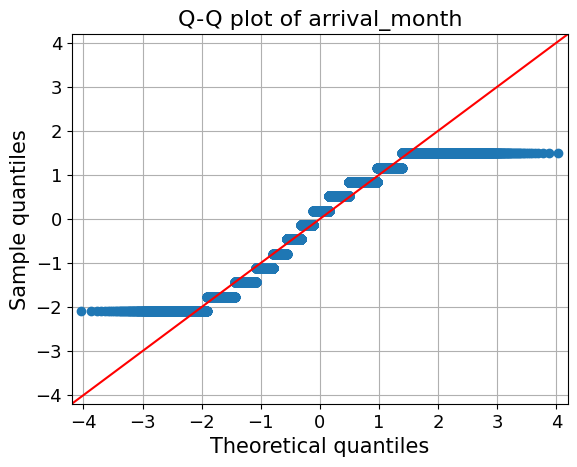

<Figure size 800x500 with 0 Axes>

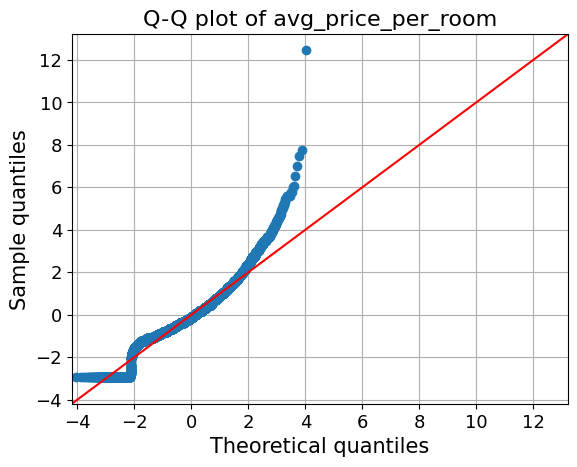

<Figure size 800x500 with 0 Axes>

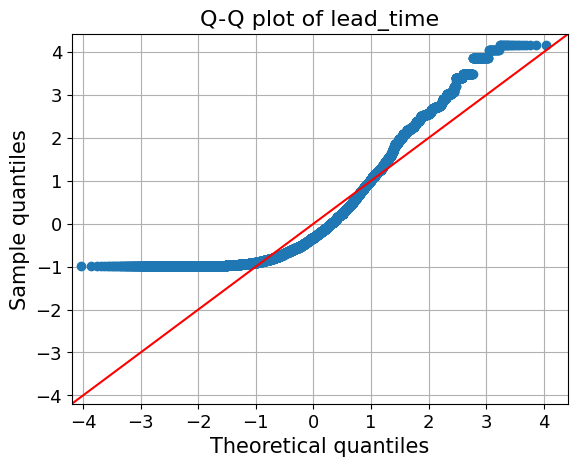

In [128]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
data_norm= data[['arrival_month', 'avg_price_per_room', 'lead_time']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

In [129]:
data_dummies = pd.get_dummies(data[['arrival_month', 'avg_price_per_room', 'lead_time',  'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights']])

<Axes: >

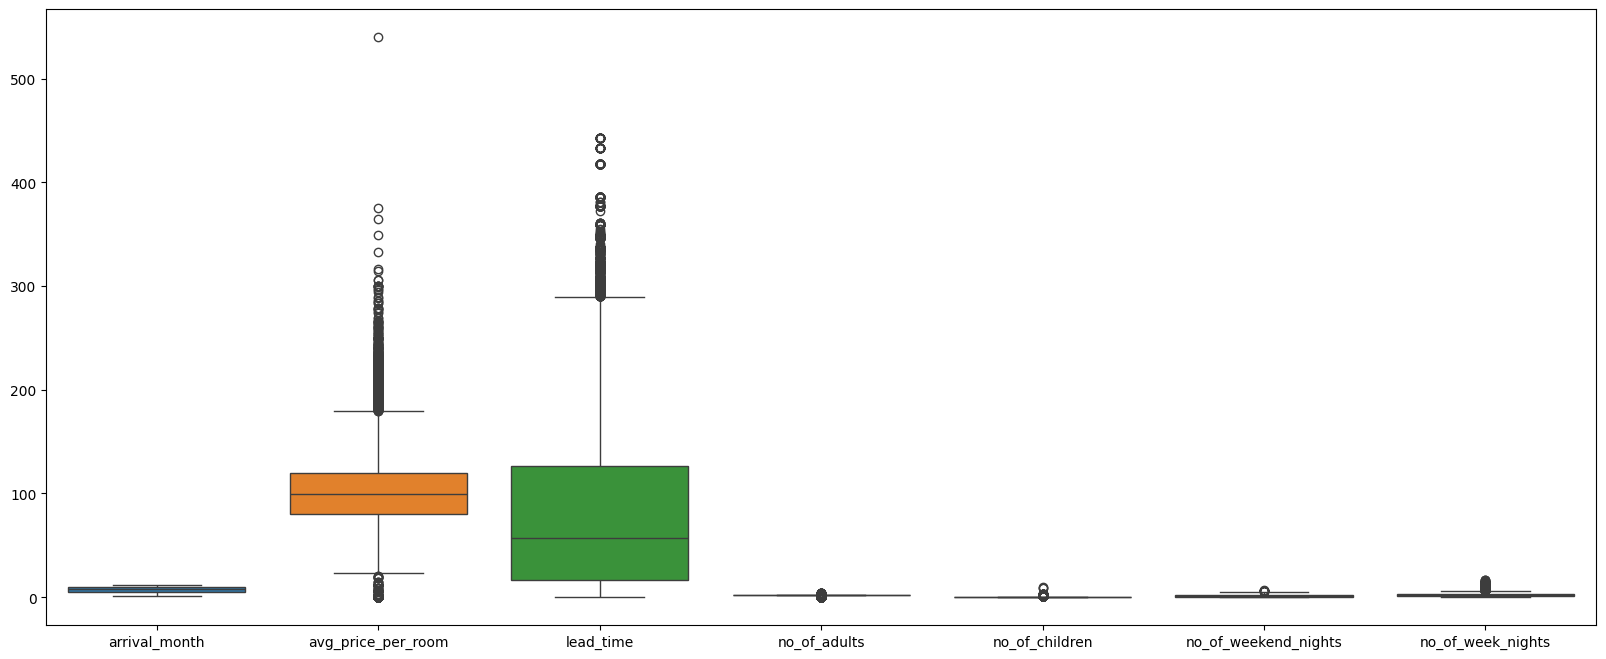

In [130]:
plt.figure(figsize=(20,8))
sns.boxplot(data=data_dummies)

<Axes: >

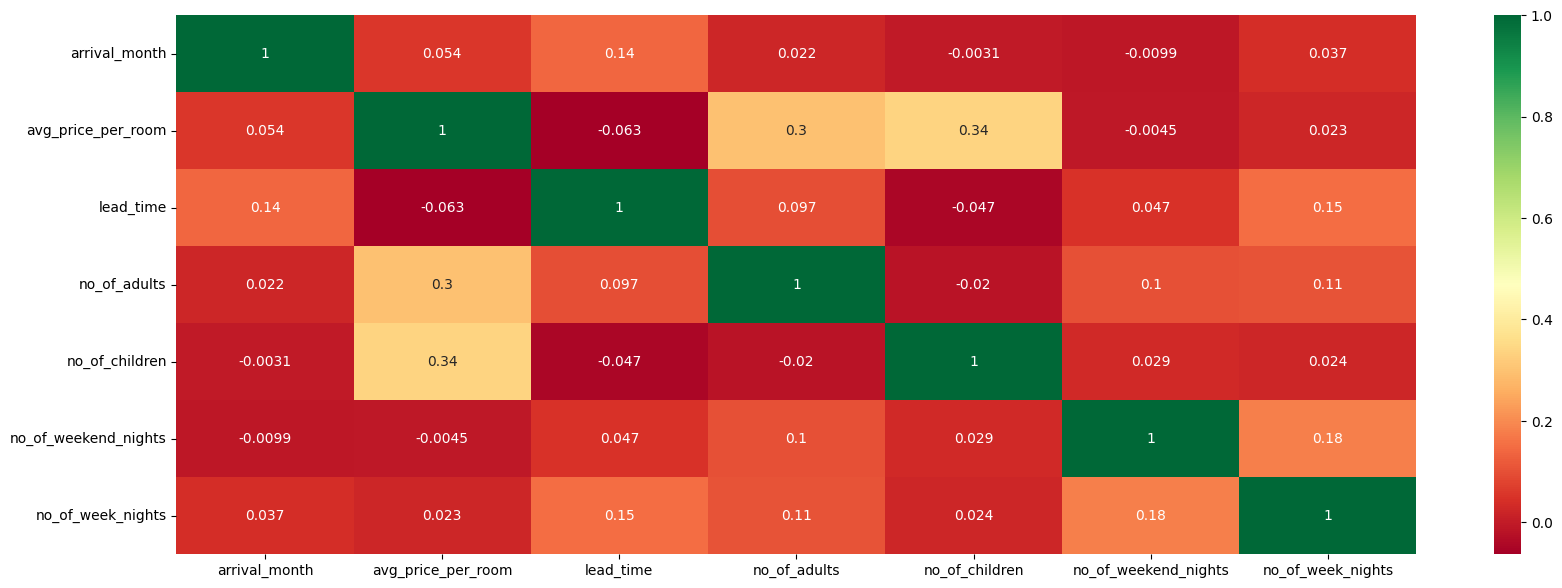

In [131]:
plt.figure(figsize=(20,7))
sns.heatmap(data_dummies.corr(), annot=True, cmap='RdYlGn')

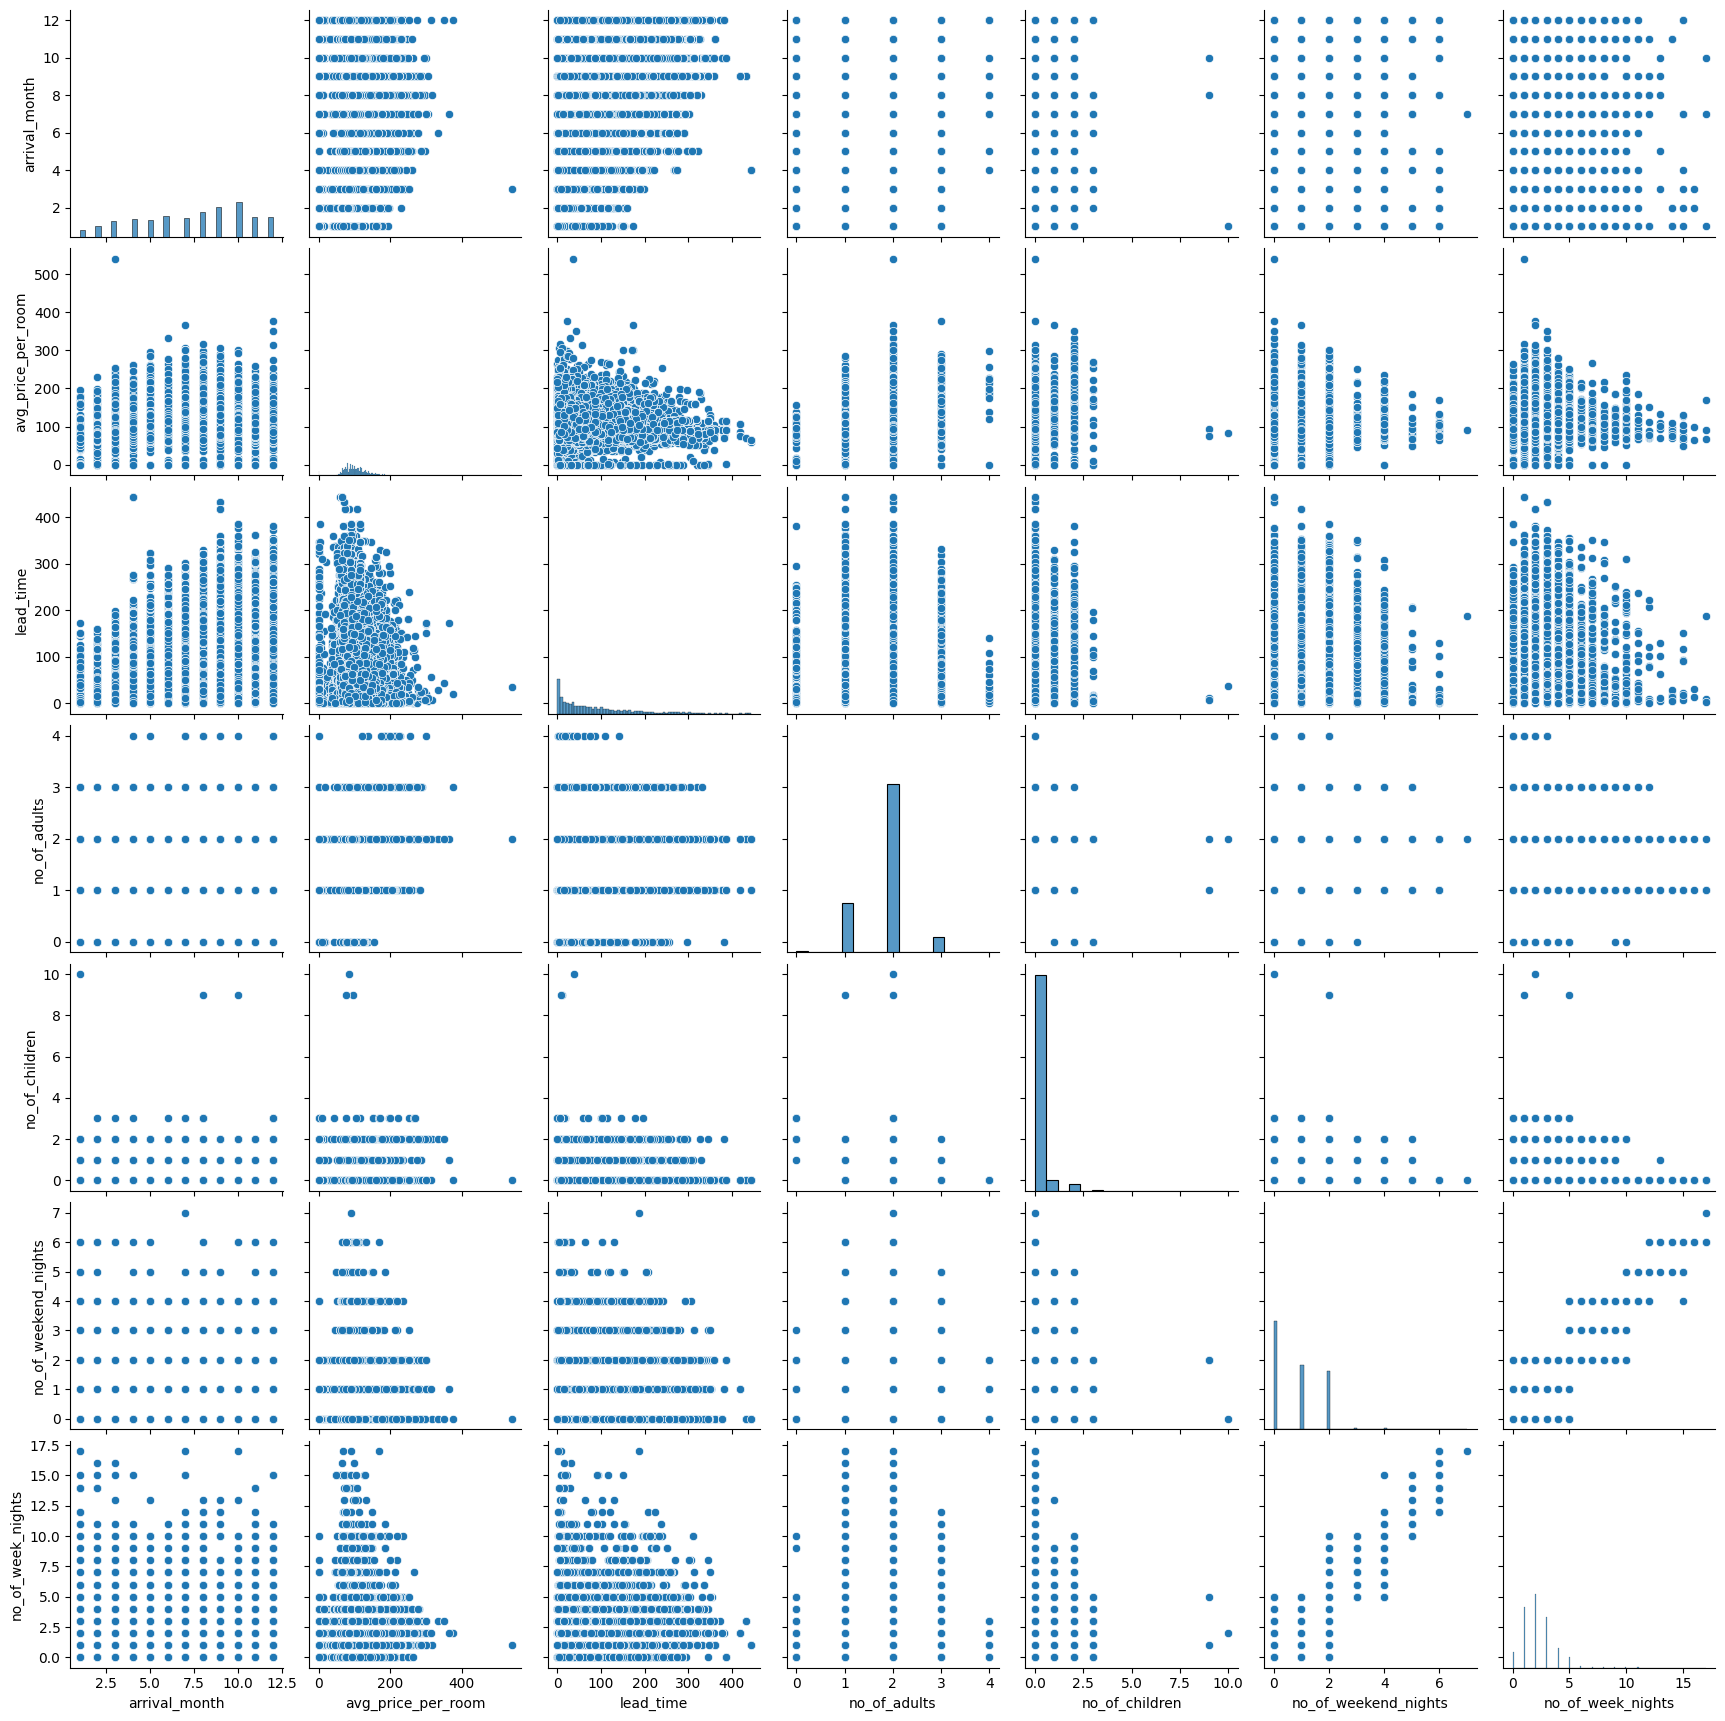

In [132]:
sns.pairplot(data_dummies)

The pair plot

In [133]:

#Dropping Booking_ID column
data = data.drop('Booking_ID', axis=1)

In [134]:
data = pd.get_dummies(data)

In [135]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'booking_status_Canceled', 'booking_status_Not_Canceled'],


In [136]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['booking_status_Not_Canceled'], data[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'booking_status_Canceled']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     booking_status_Not_Canceled   R-squared:                       1.000
Model:                                     OLS   Adj. R-squared:                  1.000
Method:                          Least Squares   F-statistic:                 4.236e+29
Date:                         Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                                 04:24:01   Log-Likelihood:             1.0833e+06
No. Observations:                        36275   AIC:                        -2.167e+06
Df Residuals:                            36246   BIC:                        -2.166e+06
Df Model:                                   28                                         
Covariance Type:                     nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_adults                         -9.664e-16   3.04e-16     -3.178      0.001   -1.56e-15    -3.7e-16
no_of_children                        1.277e-15   4.78e-16      2.670      0.008     3.4e-16    2.22e-15
no_of_weekend_nights                  3.354e-16   1.62e-16      2.071      0.038     1.8e-17    6.53e-16
no_of_week_nights                    -2.132e-17   1.01e-16     -0.211      0.833    -2.2e-16    1.77e-16
required_car_parking_space            1.089e-15   8.02e-16      1.357      0.175   -4.84e-16    2.66e-15
lead_time                            -1.205e-17   2.08e-18     -5.796      0.000   -1.61e-17   -7.98e-18
arrival_year                          5.195e-17   4.25e-16      0.122      0.903   -7.81e-16    8.85e-16
arrival_month                         1.259e-17   5.01e-17      0.251      0.802   -8.57e-17    1.11e-16
arrival_date                          5.269e-17   1.56e-17      3.368      0.001     2.2e-17    8.34e-17
repeated_guest                        6.422e-16   1.14e-15      0.561      0.575    -1.6e-15    2.89e-15
no_of_previous_cancellations         -6.204e-16    4.3e-16     -1.442      0.149   -1.46e-15    2.23e-16
no_of_previous_bookings_not_canceled  -1.73e-17   9.87e-17     -0.175      0.861   -2.11e-16    1.76e-16
avg_price_per_room                    -2.58e-17   5.61e-18     -4.598      0.000   -3.68e-17   -1.48e-17
no_of_special_requests                3.214e-16   2.06e-16      1.557      0.119   -8.31e-17    7.26e-16
type_of_meal_plan_Meal Plan 1            0.4217   3.61e-13   1.17e+12      0.000       0.422       0.422
type_of_meal_plan_Meal Plan 2            0.4217   3.61e-13   1.17e+12      0.000       0.422       0.422
type_of_meal_plan_Meal Plan 3            0.4217   3.62e-13   1.17e+12      0.000       0.422       0.422
type_of_meal_plan_Not Selected           0.4217   3.62e-13   1.17e+12      0.000       0.422       0.422
room_type_reserved_Room_Type 1           0.2410   2.07e-13   1.17e+12      0.000       0.241       0.241
room_type_reserved_Room_Type 2           0.2410   2.07e-13   1.17e+12      0.000       0.241       0.241
room_type_reserved_Room_Type 3           0.2410   2.07e-13   1.17e+12      0.000       0.241       0.241
room_type_reserved_Room_Type 4           0.2410   2.07e-13   1.17e+12      0.000       0.241       0.241
room_type_reserved_Room_Type 5           0.2410   2.07e-13   1.17e+12      0.000       0.241       0.241
room_type_reserved_Room_Type 6           0.2410   2.07e-13   1.17e+12      0.000       0.241       0.241
room_type_reserved_Room_Type 7           0.2410   2.07e-13   1.17e+12      0.000       0.241       0.241
market_segment_type_Aviation             0.3

In [137]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,1,0,0,1
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,1,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,1,1,0
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,1,1,0
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,0,0,0,0,0,0,0,1,0,1
36271,2,0,1,3,0,228,2018,10,17,0,...,0,0,0,0,0,0,0,1,1,0
36272,2,0,2,6,0,148,2018,7,1,0,...,0,0,0,0,0,0,0,1,0,1
36273,2,0,0,3,0,63,2018,4,21,0,...,0,0,0,0,0,0,0,1,1,0


In [138]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Extract features (X) and target variable (y)
X = data[[col for col in data.columns if col not in ['booking_status_Not_Canceled', 'booking_status_Canceled']]]
y = data['booking_status_Not_Canceled']  # Target variable

# Split the data into 80% training and 20% for validation/test (combined)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the 'temp' data into 50% validation and 50% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now, you have X_train, y_train (80% of the data for training),
# X_val, y_val (10% of the data for validation), and
# X_test, y_test (10% of the data for testing)

In [139]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [140]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [141]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 0.14
Coefficient of determination: 0.34
R^2 score on tarining set = 0.34455049536110316


In [142]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 0.15
Coefficient of determination: 0.35
R^2 score on test set = 0.3486950930833963


In [143]:

# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 0.14
Coefficient of determination: 0.36
R^2 score on validation set = 0.3571345411799898


In [144]:
# Assuming you have a DataFrame 'data' with your features
std_deviation = data.std()

# Display the standard deviation of each feature
print(std_deviation)

# Calculate the mean of each feature
mean_values = data.mean()

# Display the mean values
print(mean_values)

no_of_adults                             0.518715
no_of_children                           0.402648
no_of_weekend_nights                     0.870644
no_of_week_nights                        1.410905
required_car_parking_space               0.173281
lead_time                               85.930817
arrival_year                             0.383836
arrival_month                            3.069894
arrival_date                             8.740447
repeated_guest                           0.158053
no_of_previous_cancellations             0.368331
no_of_previous_bookings_not_canceled     1.754171
avg_price_per_room                      35.089424
no_of_special_requests                   0.786236
type_of_meal_plan_Meal Plan 1            0.422538
type_of_meal_plan_Meal Plan 2            0.287769
type_of_meal_plan_Meal Plan 3            0.011740
type_of_meal_plan_Not Selected           0.348459
room_type_reserved_Room_Type 1           0.417281
room_type_reserved_Room_Type 2           0.136796


In [145]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=3, criterion= "squared_error", max_depth= 4)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=3)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.01046
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.50061
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.02138
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.09733
Feature: 13, Score: 0.15465
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.21556


<BarContainer object of 30 artists>

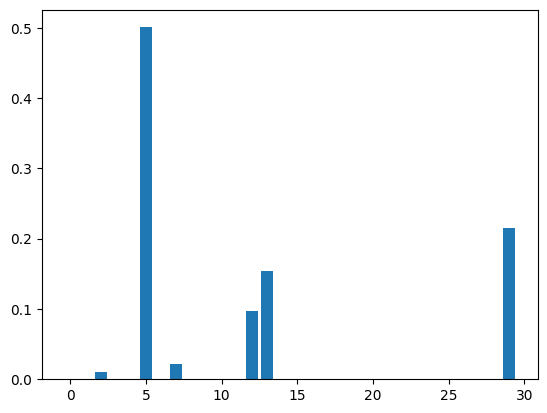

In [146]:
importance = model.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

In [153]:
count = 0
for i in X.columns:
  count += 1
  print(count, i)

1 no_of_adults
2 no_of_children
3 no_of_weekend_nights
4 no_of_week_nights
5 required_car_parking_space
6 lead_time
7 arrival_year
8 arrival_month
9 arrival_date
10 repeated_guest
11 no_of_previous_cancellations
12 no_of_previous_bookings_not_canceled
13 avg_price_per_room
14 no_of_special_requests
15 type_of_meal_plan_Meal Plan 1
16 type_of_meal_plan_Meal Plan 2
17 type_of_meal_plan_Meal Plan 3
18 type_of_meal_plan_Not Selected
19 room_type_reserved_Room_Type 1
20 room_type_reserved_Room_Type 2
21 room_type_reserved_Room_Type 3
22 room_type_reserved_Room_Type 4
23 room_type_reserved_Room_Type 5
24 room_type_reserved_Room_Type 6
25 room_type_reserved_Room_Type 7
26 market_segment_type_Aviation
27 market_segment_type_Complementary
28 market_segment_type_Corporate
29 market_segment_type_Offline
30 market_segment_type_Online


In [147]:
from scipy import stats

# Calculate Z-scores for the 'No_of_Votes' column
z_scores = np.abs(stats.zscore(data['arrival_month']))

# Define a Z-score threshold (e.g., ±3)
z_threshold = 3

# Filter out rows with Z-scores beyond the threshold
data_no_outliers = data[(z_scores < z_threshold)]

# Display the data without outliers
data_no_outliers.head(20)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,1,0,0,1
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,1,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,1,1,0
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,1,1,0
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,1,1,0
5,2,0,0,2,0,346,2018,9,13,0,...,0,0,0,0,0,0,0,1,1,0
6,2,0,1,3,0,34,2017,10,15,0,...,0,0,0,0,0,0,0,1,0,1
7,2,0,1,3,0,83,2018,12,26,0,...,0,0,0,0,0,0,0,1,0,1
8,3,0,0,4,0,121,2018,7,6,0,...,0,0,0,0,0,0,1,0,0,1
9,2,0,0,5,0,44,2018,10,18,0,...,0,0,0,0,0,0,0,1,0,1


In [148]:
from sklearn.ensemble import GradientBoostingRegressor

In [149]:
model = GradientBoostingRegressor(learning_rate=0.25)
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.25)

Feature: 0, Score: 0.01754
Feature: 1, Score: 0.00037
Feature: 2, Score: 0.01020
Feature: 3, Score: 0.01042
Feature: 4, Score: 0.00807
Feature: 5, Score: 0.43697
Feature: 6, Score: 0.01222
Feature: 7, Score: 0.05157
Feature: 8, Score: 0.00689
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00033
Feature: 11, Score: 0.00013
Feature: 12, Score: 0.13904
Feature: 13, Score: 0.15534
Feature: 14, Score: 0.00187
Feature: 15, Score: 0.00706
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00139
Feature: 18, Score: 0.00038
Feature: 19, Score: 0.00044
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00041
Feature: 22, Score: 0.00030
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00020
Feature: 25, Score: 0.00024
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00168
Feature: 28, Score: 0.01302
Feature: 29, Score: 0.12394


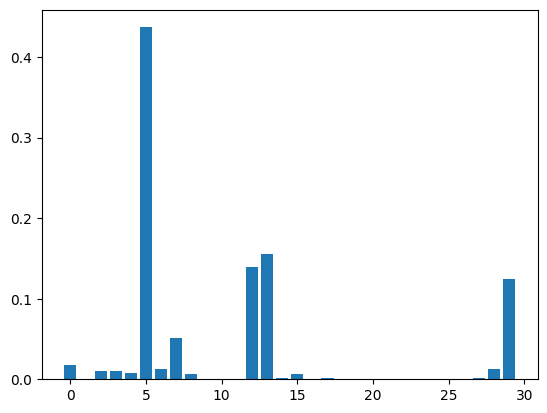

In [150]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is defined somewhere in the code above as your DataFrame
# Define the categorical and numeric columns
categorical_columns = ['type_of_meal_plan_Meal Plan 1',
                      'type_of_meal_plan_Meal Plan 2',
                      'type_of_meal_plan_Meal Plan 3',
                      'type_of_meal_plan_Not Selected',
                      'room_type_reserved_Room_Type 1',
                      'room_type_reserved_Room_Type 2',
                      'room_type_reserved_Room_Type 3',
                      'room_type_reserved_Room_Type 4',
                      'room_type_reserved_Room_Type 5',
                      'room_type_reserved_Room_Type 6',
                      'room_type_reserved_Room_Type 7',
                      'market_segment_type_Aviation',
                      'market_segment_type_Complementary',
                      'market_segment_type_Corporate',
                      'market_segment_type_Offline',
                      'market_segment_type_Online',
                      'booking_status_Canceled',
                      'booking_status_Not_Canceled']
numeric_columns = [col for col in data.columns if col not in categorical_columns]

# Create a copy of the original data
data_copy = data.copy()

# Define the percentage of data to remove (1%, 5%, 10%)
percentages_to_remove = [0.01, 0.05, 0.10]

for percentage in percentages_to_remove:
    print(f'With {percentage*100} % removal of data: ')
    # Randomly select rows to remove
    num_rows_to_remove = int(len(data_copy) * percentage)
    removed_indices = np.random.choice(data_copy.index, num_rows_to_remove, replace=False)

    # Create a version of the data with missing values
    data_with_missing = data_copy.copy()
    data_with_missing.loc[removed_indices, numeric_columns] = np.nan

    # Perform imputation using multiple methods
    imputation_methods = ['mean', 'iterative', 'knn']
    for method in imputation_methods:
        if method == 'mean':
            imputer = SimpleImputer(strategy='mean')
        elif method == 'iterative':
            imputer = IterativeImputer(max_iter=10, random_state=0)
        elif method == 'knn':
            imputer = KNNImputer(n_neighbors=2)

        # Impute missing values for numeric columns
        data_imputed_numeric = imputer.fit_transform(data_with_missing[numeric_columns])

        # Create DataFrames from imputed arrays for numeric columns
        data_imputed_df_numeric = pd.DataFrame(data_imputed_numeric, columns=numeric_columns, index=data_with_missing.index)

        # Merge imputed numeric and original categorical data
        data_imputed = pd.concat([data_with_missing[categorical_columns], data_imputed_df_numeric], axis=1)

        # Evaluate imputation quality for numeric columns
        for col in numeric_columns:
            # For numeric columns, calculate % error on residuals
            original_values = data_copy.loc[removed_indices, col]
            imputed_values = data_imputed.loc[removed_indices, col]
            mask = ~np.isnan(original_values)
            error = np.abs(original_values[mask] - imputed_values[mask]) / original_values[mask]
            mean_percent_error = error.mean() * 100
            print(f'{method} imputation for {col}: Mean % Error on Residuals = {mean_percent_error:.2f}%')

        # Evaluate imputation quality for categorical columns
        for col in categorical_columns:
            # Impute missing values for categorical columns using the most frequent value
            categorical_imputer = SimpleImputer(strategy='most_frequent')
            data_with_missing[col] = categorical_imputer.fit_transform(data_with_missing[[col]])

            # For categorical columns, calculate accuracy and confusion matrix
            le = LabelEncoder()
            original_values = le.fit_transform(data_copy.loc[removed_indices, col].astype(str))
            imputed_values = le.transform(data_with_missing.loc[removed_indices, col].astype(str))

            accuracy = accuracy_score(original_values, imputed_values)
            confusion = confusion_matrix(original_values, imputed_values)
            print(f'{method} imputation for {col}: Accuracy = {accuracy:.2f}')
            print(f'Confusion Matrix:\n{confusion}\n')



With 1.0 % removal of data: 
mean imputation for no_of_adults: Mean % Error on Residuals = inf%
mean imputation for no_of_children: Mean % Error on Residuals = inf%
mean imputation for no_of_weekend_nights: Mean % Error on Residuals = inf%
mean imputation for no_of_week_nights: Mean % Error on Residuals = inf%
mean imputation for required_car_parking_space: Mean % Error on Residuals = inf%
mean imputation for lead_time: Mean % Error on Residuals = inf%
mean imputation for arrival_year: Mean % Error on Residuals = 0.01%
mean imputation for arrival_month: Mean % Error on Residuals = 63.55%
mean imputation for arrival_date: Mean % Error on Residuals = 128.02%
mean imputation for repeated_guest: Mean % Error on Residuals = inf%
mean imputation for no_of_previous_cancellations: Mean % Error on Residuals = inf%
mean imputation for no_of_previous_bookings_not_canceled: Mean % Error on Residuals = inf%
mean imputation for avg_price_per_room: Mean % Error on Residuals = inf%
mean imputation for

# **Answering Questions:**

Q1 : What are the data types? (Only numeric and categorical)


*   Numerical - no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, required_car_parking_space, lead_time, arrival_year, arrival_month, arrival_date, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests
*   Categorical- Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, booking_status


Q2 : Are there missing values?

*   There are no missing values in the dataset


Q3 : What are the likely distributions of the numeric variables?

*   Likely distributions of Numerical variables are plotted above using Histogram, QQ-plot

Q4 : Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Feature 5 (required_car_parking_space) and Feature 29 (market_segment_type_Offline) are the most important features based on the Decision Tree Model, Gradient Boosting Regressor Model

Q5 : Which independent variables have missing data? How much?


*   No independent variables have any missing data or zeros


Q6 : Do the training and test sets have the same data?


*   No, I've used a 80, 10, 10 split of Training, Test, Validation split.


Q7 : In the predictor variables independent of all the other predictor variables?

* Only no_of_adults and no_of_previous_cancellations happen to have a correlation based on the graph shown above which proves that they are correlated.


Q8 : Which predictor variables are the most important?

* Based on OLS Regression Results:
  
  * arrival_month: P-value: 0.802, Significance: Not statistically significant (p > 0.05)

  * arrival_year: P-value: 0.903, Significance: Not statistically significant (p > 0.05)

  * avg_price_per_room: P-value: 0.0, Significance: Statistically significant (p < 0.05)

  * lead_time: P-value: 0.0, Significance: Statistically significant (p < 0.05)

  In summary, based on the p-values:

* Highly Statistically Significant Features: "lead_time" and "avg_price_per_room."

*  Not Statistically Significant Features: "arrival_year" and "arrival_month."


Q9 : Do the ranges of the predictor variables make sense?

* Since most of the variables are categorical, the range always lies between 0 and 1 (either 0 or 1)

Q10 : What are the distributions of the predictor variables?

* Above are the hist distributions

Q11 : Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* As the values seem almost same, I do not think that there will be any change in the final predictive model.

Q12 : Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals

* The % error on residuals are present above.

# **Conclusion:**

From the analysis done above on the data set, it is clear that there is multicollinearity between avg_price_per_room and market_segment_type but avg_price_per_room has the highest significance amongst the predictor variables

# **References:**

1. Sckit learn offcial documentation

2. Refered Towards Data Science

3. Eli5 official documentation


The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documnetation

<br>
<br>
<br>


# **Licensing:**

MIT License

Copyright (c) 2024 sainikhilreddychalla

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
